<h1>Содержание<span class="TokSkip"></span></h1>

## Изучение фалов данных

### Библиотеки

In [1]:
# достаём библиотеки
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st

# библиотека сиборн для визуализации на Питоне поверх matplotlib
import seaborn as sns

In [2]:
# Импорт библиотеки высокоуровневых математических функций
import numpy as np

from statsmodels.stats.proportion import proportions_ztest

In [3]:
# лаконичный, последовательный, высокоуровневый API для создания фигур
import plotly.express as px

In [4]:
import plotly.graph_objects as go

In [5]:
# уберём warnings
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [6]:
import datetime as dt

# Модуль Re для регулярных выражений в Python
import re

In [7]:
# для построения графика воронки
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
# библиотеки для машинного обучения
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,  precision_score, recall_score

# для кластарезации
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

### Настройки

In [9]:
# format вывода значений в виде числа с 2-мя знаками после запятой
pd.options.display.float_format = '{:,.3f}'.format

In [10]:
# количество отображаемых столбцов
# pd.options.display.max_columns = 200
pd.set_option('max_columns',None)

### Вывод и изучение данных
<a id="start"></a>

In [11]:
# конструкция для работы с путями файлов на локальной машине и на сервере Практикума
try:
    gym_churn = pd.read_csv('/datasets/gym_churn.csv', sep=',')
except:
    gym_churn = pd.read_csv('my_datasets/gym_churn.csv', sep=',')
    
display(gym_churn.head(10))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0
5,1,1,0,0,1,1,1,34,450.744,1.000,3,2.623,2.637,0
6,1,1,1,1,0,6,1,32,94.266,6.000,2,1.139,1.277,0
7,0,1,0,0,1,1,0,30,217.787,1.000,0,1.214,1.049,1
8,1,1,1,1,1,1,1,23,45.410,1.000,1,1.106,1.059,0
9,0,1,0,0,1,1,0,31,65.311,1.000,11,1.811,1.951,0


In [12]:
# глянем случайную выборку
display(gym_churn.sample(8, random_state=1))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
200,0,1,1,0,1,1,0,34,46.492,1.000,0,1.011,0.000,1
1078,1,1,0,0,1,1,0,27,24.554,1.000,4,1.391,0.979,1
610,1,1,1,1,1,6,1,31,85.672,6.000,1,1.010,0.731,1
2159,1,0,1,0,1,1,0,26,75.803,1.000,1,1.457,1.540,1
1169,0,0,0,0,1,1,0,31,410.757,1.000,3,2.402,2.473,0
2448,0,0,0,0,1,12,1,28,106.110,10.000,3,2.559,2.521,0
2938,1,1,0,0,0,1,0,23,199.155,1.000,0,2.947,2.702,1
813,1,1,1,1,1,6,1,34,115.869,4.000,9,0.652,0.571,0


In [13]:
display(gym_churn.tail(10))

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3990,1,0,1,0,1,12,0,33,31.771,8.000,10,1.832,1.925,0
3991,1,0,1,0,1,6,0,33,69.301,6.000,1,1.367,1.436,0
3992,0,1,1,1,1,12,0,31,223.102,8.000,4,3.856,3.797,0
3993,0,1,1,0,1,1,0,33,231.779,1.000,3,1.419,1.450,0
3994,1,1,0,0,1,1,0,26,31.067,1.000,1,1.157,0.270,1
3995,1,1,1,0,1,12,0,33,2.406,12.000,8,2.284,2.349,0
3996,0,1,0,0,1,1,1,29,68.884,1.000,1,1.277,0.293,1
3997,1,1,1,1,1,12,0,28,78.251,11.000,2,2.786,2.831,0
3998,0,1,1,1,1,6,0,32,61.913,5.000,3,1.630,1.596,0
3999,1,0,1,0,0,12,1,30,178.862,12.000,1,1.102,1.035,0


In [14]:
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


### Изучение пропущенных значений

Пропущенных значений не отмечено

### Описание данных

Набор данных включает следующие поля:

   - **'Churn'** — факт оттока в текущем месяце;
   - Текущие поля в датасете:
       - Данные клиента за предыдущий до проверки факта оттока месяц:
           - **'gender'** — пол;
           - **'Near_Location'** — проживание или работа в районе, где находится фитнес-центр;
           - **'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
           - **Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
           - **'Phone'** — наличие контактного телефона;
           - **'Age'** — возраст;
           - **'Lifetime'** — время с момента первого обращения в фитнес-центр (в месяцах).
   - Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
       - **'Contract_period'** — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
       - **'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);
       - **'Group_visits'** — факт посещения групповых занятий;
       - **'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;
       - **'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;
       - **'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

### Вывод

Мы описали наши цели и задачи. Пропущенных значений не отмечено. Описали данные из таблицы. Столбцов с неверным форматом не отмечено. Единственное не совсем понял про стобец lifetime, нужно ли мне его перевести в формат даты и далее использовать разбиение на train_test не random_split, а time split. Решил использовать первый вариант пока

## Предобработка данных
<a id=preprocessing></a>

### Изучение данных
<a id=learning></a>

In [15]:
# в цикле выводим `value_counts()` для каждого столбца

for col in gym_churn.columns:
    print(str(col))
    display(gym_churn[col].value_counts())

gender


1    2041
0    1959
Name: gender, dtype: int64

Near_Location


1    3381
0     619
Name: Near_Location, dtype: int64

Partner


0    2053
1    1947
Name: Partner, dtype: int64

Promo_friends


0    2766
1    1234
Name: Promo_friends, dtype: int64

Phone


1    3614
0     386
Name: Phone, dtype: int64

Contract_period


1     2207
12     960
6      833
Name: Contract_period, dtype: int64

Group_visits


0    2351
1    1649
Name: Group_visits, dtype: int64

Age


29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64

Avg_additional_charges_total


135.757    1
97.624     1
82.487     1
17.911     1
74.883     1
          ..
163.080    1
133.640    1
9.839      1
134.699    1
357.047    1
Name: Avg_additional_charges_total, Length: 4000, dtype: int64

Month_to_end_contract


1.000     2207
6.000      645
12.000     524
11.000     181
5.000      130
10.000      82
9.000       73
4.000       58
8.000       38
7.000       25
3.000       23
2.000       14
Name: Month_to_end_contract, dtype: int64

Lifetime


1     843
2     610
3     490
0     487
4     383
5     273
6     220
7     167
8     111
9     100
10     76
12     53
11     48
13     28
14     24
15     24
16     15
17     11
19      7
20      7
18      7
21      5
24      2
22      2
26      2
23      2
29      1
27      1
31      1
Name: Lifetime, dtype: int64

Avg_class_frequency_total


0.000    88
3.071     1
3.275     1
2.688     1
0.751     1
         ..
1.802     1
3.519     1
1.750     1
1.315     1
2.864     1
Name: Avg_class_frequency_total, Length: 3913, dtype: int64

Avg_class_frequency_current_month


0.000    181
2.039      1
1.202      1
2.982      1
2.619      1
        ... 
1.288      1
2.349      1
3.399      1
0.473      1
3.721      1
Name: Avg_class_frequency_current_month, Length: 3820, dtype: int64

Churn


0    2939
1    1061
Name: Churn, dtype: int64

Каких то подозрительных значений не отмечено

### Работа с пропущенными значениями

Ранее мы их не обнаружили

### Работа с типами данных
<a id=type></a>

Вроде с типами данных всё хорошо

### Работа с дубликатами

In [16]:
# посчитаем дубликаты
gym_churn.duplicated().sum()

0

Ожидал их увидеть без уникального индификатора, но нет, дубликатов не обнаружено. Видимо в датасете не так много строк для этого

## Проведение исследовательского анализа

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());

In [17]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


In [18]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,"4,000.000",0.510,0.500,0.000,0.000,1.000,1.000,1.000
Near_Location,"4,000.000",0.845,0.362,0.000,1.000,1.000,1.000,1.000
Partner,"4,000.000",0.487,0.500,0.000,0.000,0.000,1.000,1.000
Promo_friends,"4,000.000",0.308,0.462,0.000,0.000,0.000,1.000,1.000
Phone,"4,000.000",0.903,0.295,0.000,1.000,1.000,1.000,1.000
Contract_period,"4,000.000",4.681,4.550,1.000,1.000,1.000,6.000,12.000
Group_visits,"4,000.000",0.412,0.492,0.000,0.000,0.000,1.000,1.000
Age,"4,000.000",29.184,3.258,18.000,27.000,29.000,31.000,41.000
Avg_additional_charges_total,"4,000.000",146.944,96.356,0.148,68.869,136.220,210.950,552.591
Month_to_end_contract,"4,000.000",4.323,4.191,1.000,1.000,1.000,6.000,12.000


По всем признакам есть различные значения. Категориальных признаков нет. Судя по средним значениям Большинство людей живут рядом, примерно поровну женщин и мужчин. Примерно половина это партнёры. Средний возраст 29 лет, основная часть от 26 лет до 32. Средний срок абонемента 4.68 месяцев. Судя по факту оттока, если учесть, что 1 - отток, 0 - нет, в текущем месяце прекратило ходить 27% клиентов

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());

In [19]:
gym_churn_churn = gym_churn.groupby(by='Churn')
gym_churn_churn.mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510,0.873,0.534,0.354,0.904,5.747,0.464,29.977,158.446,5.283,4.712,2.025,2.028
1,0.511,0.768,0.355,0.184,0.903,1.729,0.269,26.990,115.083,1.663,0.991,1.475,1.045


В среднем более склонны к уходу:
   - кто живёт не рядом и/или не работает рядом
   - кто приходит не по программе партнёров
   - пришёл не от друга
   - те, кто оформляют более короткие абонементы
   - реже посещают групповые занятия
   - средний возраст несколько ниже
   - меньше тратит на другие товары/услуги
   - осталось ало времени до окончания обонемента
   - недавно пришёл
   - ходят реже в неделю за весь период
   - так же реже посещают и в прошлом месяце

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

In [20]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227,5.000,3,0.020,0.000,0
1,0,1,0,0,1,12,1,31,113.203,12.000,7,1.923,1.910,0
2,0,1,1,0,1,1,0,28,129.448,1.000,2,1.859,1.737,0
3,0,1,1,1,1,12,1,33,62.670,12.000,2,3.206,3.357,0
4,1,1,1,1,1,1,0,26,198.362,1.000,3,1.114,1.120,0


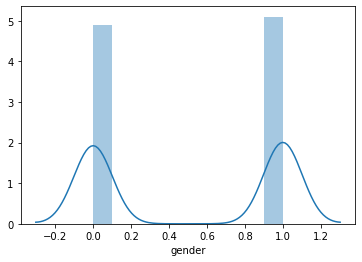

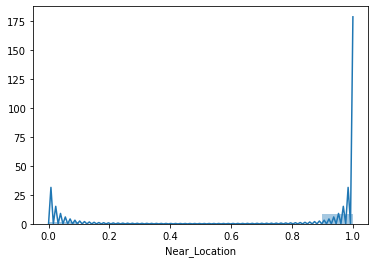

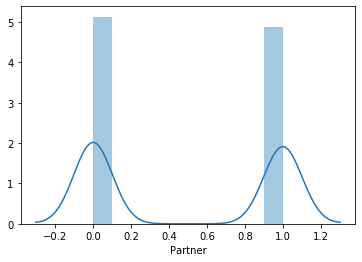

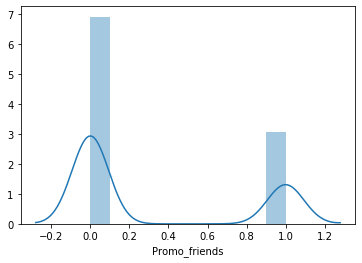

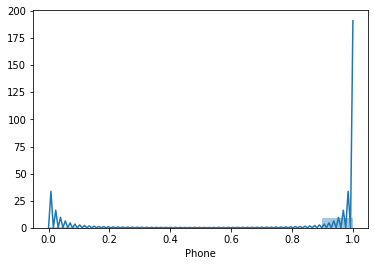

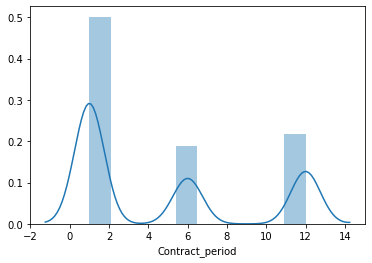

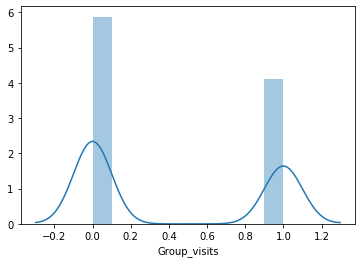

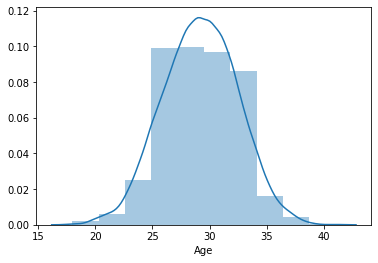

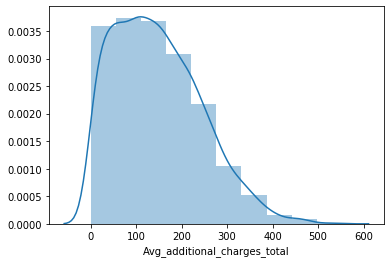

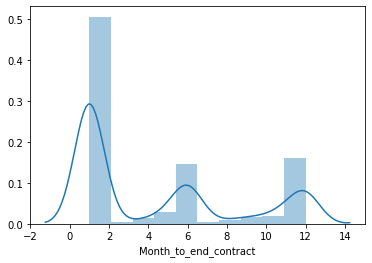

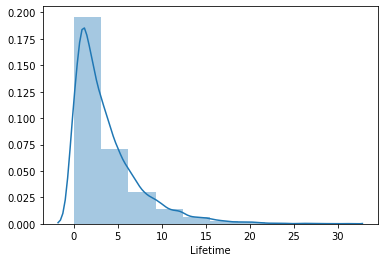

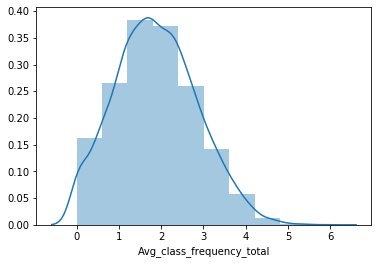

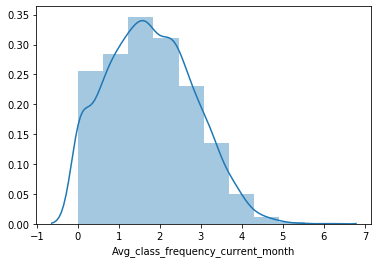

In [21]:
#построим попарные диаграммы распределения для каждого признака
for col in gym_churn.drop('Churn', axis = 1).columns:
    sns.distplot(gym_churn[col], bins=10) 
    plt.show()

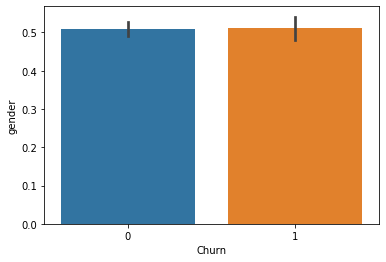

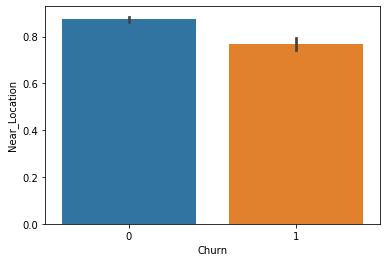

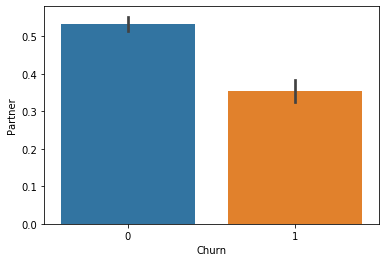

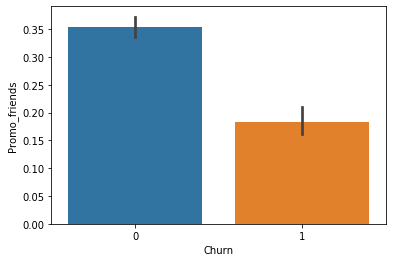

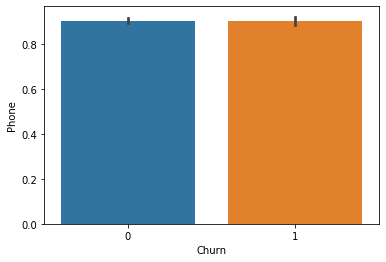

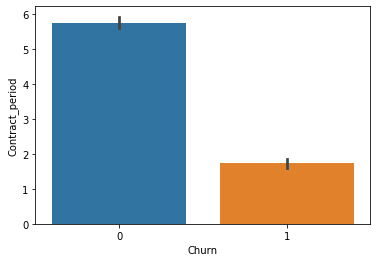

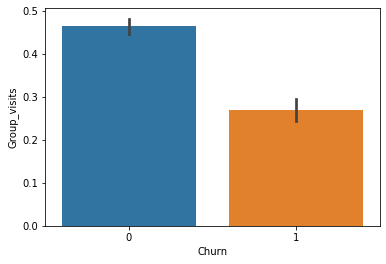

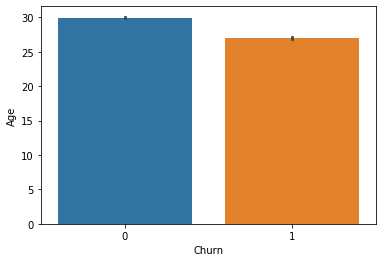

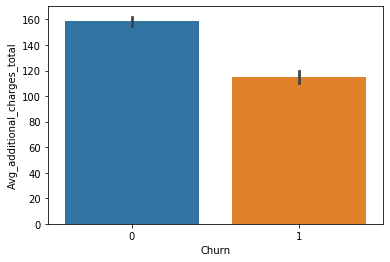

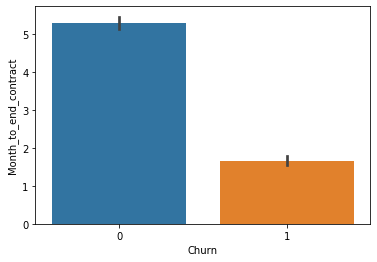

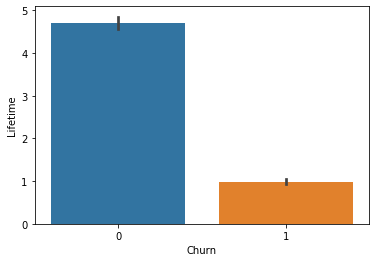

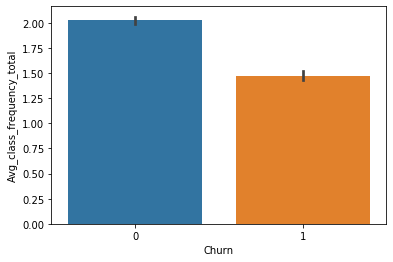

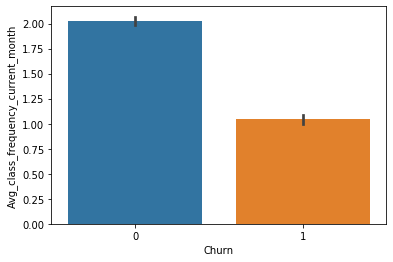

In [22]:
# построим попарные столбачыте гистограммы признак-целевая переменная для каждого признака
for col in gym_churn.drop('Churn', axis = 1).columns:
    sns.barplot(x=gym_churn['Churn'], y=gym_churn[col]) 
    plt.show()

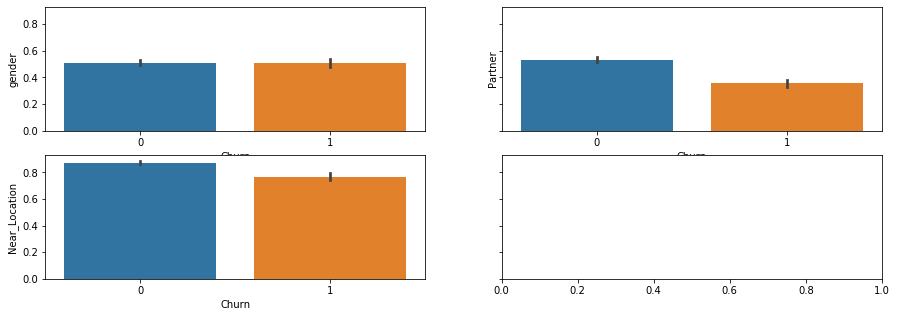

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=axes[0,0], x=gym_churn['Churn'], y=gym_churn['gender'])
sns.barplot(ax=axes[0,1], x=gym_churn['Churn'], y=gym_churn['Partner'])
sns.barplot(ax=axes[1,0], x=gym_churn['Churn'], y=gym_churn['Near_Location'])
plt.show()

Сразу видны отличия по оттоку по признакам:
- partner
- promo_friends
- contract_period
- group_visits
- Avg_additional_charges_total
- Month_to_end_contract
- lifetime
- Avg_class_frequency_current_month

### Постройте матрицу корреляций и отобразите её

In [24]:
# построим и отрисуем матрицу корреляций
cm = gym_churn.corr() # вычисляем матрицу корреляций

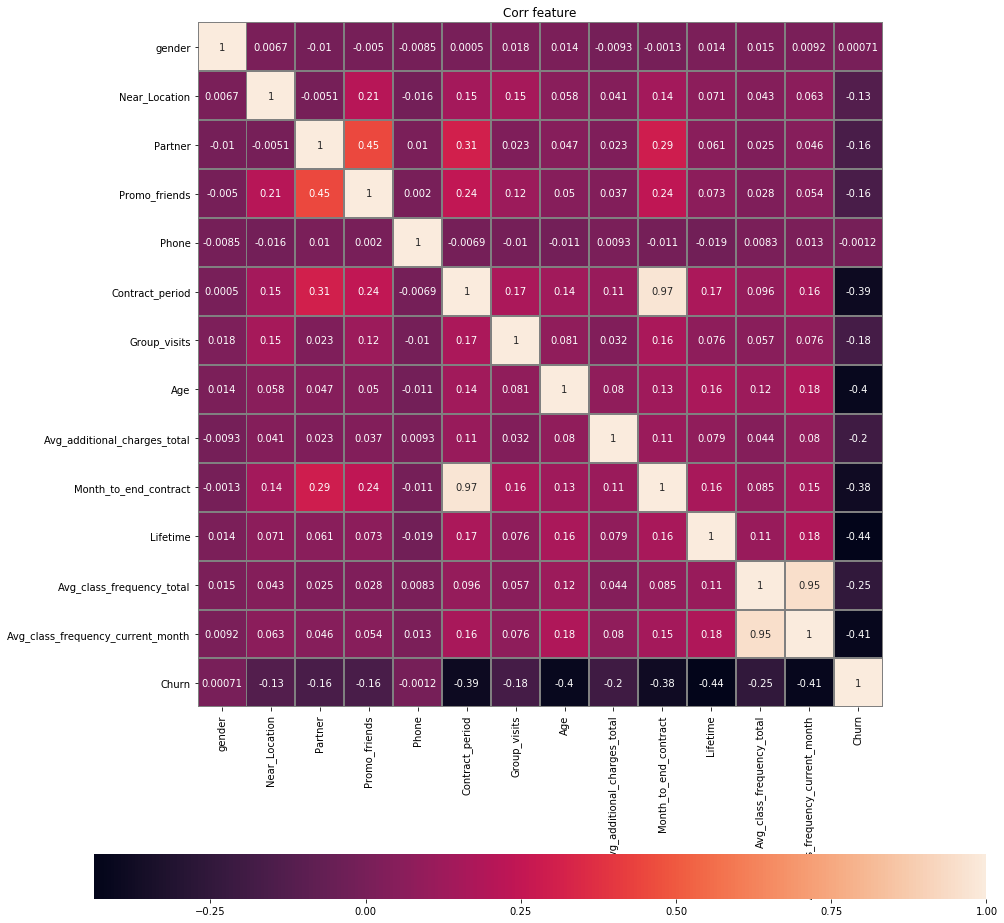

In [25]:
# нарисуем тепловую карту с подписями для матрицы корреляций

plt.figure(figsize=(16, 18))
plt.title('Corr feature')
sns.heatmap(cm, 
            annot = True,
            square=True,
            linewidths=1, 
            linecolor='gray',
            cbar_kws= {'orientation': 'horizontal'},
            fmt='.2g')
plt.show()

Мы видим сильную корреляцию:
- Avg_class_frequency_current_month : Avg_class_frequency_total
- Month_to_end_contract : Contract_period

Чтобы избежать мультиколлинеарности, стоит избавиться от дублирующих признаков
 
Что же касается нашей целевой переменной, с ней сильней всего коррелирует в обратную сторону:
- Contract_period
- Age
- Month_to_end_contract
- Lifetime
- Avg_class_frequency_current_month

In [26]:
gym_churn = gym_churn.drop(['Avg_class_frequency_current_month', 'Month_to_end_contract'], axis = 1)
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
0,1,1,1,1,0,6,1,29,14.227,3,0.020,0
1,0,1,0,0,1,12,1,31,113.203,7,1.923,0
2,0,1,1,0,1,1,0,28,129.448,2,1.859,0
3,0,1,1,1,1,12,1,33,62.670,2,3.206,0
4,1,1,1,1,1,1,0,26,198.362,3,1.114,0


## Постройте модель прогнозирования оттока клиентов

Постройте модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце.

### Разбейте данные на обучающую и валидационную выборку функцией train_test_split()

In [27]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym_churn.drop('Churn', axis = 1)
y = gym_churn['Churn']

In [28]:
# разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Я выбрал метод случайной разбивки, т.к. Хоть я и прогнозирую отток, но у меня нет данных по каждому клиенту на каждый месяц. Вроде бы нет

### Обучите модель на train-выборке двумя способами:

Используем для обучения:
- логистическая регрессия
- случайный лес

Стандартизацию я решил сделать раньше, не по порядку заданий, т.к. далее нарисовал график важности признаков и на нём заметно, использую ли я стандартизированные данные или нет

In [29]:
#создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train) # обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

In [30]:
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [31]:
print(X_train_st[:5])

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.12734972  1.75580418]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378  5.88138322 -0.2239674 ]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  0.3350108  -0.84308456]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  1.39146269  0.66771379]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435  0.07089783 -0.19587934]]


Отрицательные значения нормально, это нужно для метрик

In [32]:
# Зададим список моделей
models = [
    LogisticRegression(random_state=1),
    RandomForestClassifier(random_state=1)
]

In [33]:
# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape = perc_error_abs.sum() / len(y_true)
    return mape

Она правда не нужна сейчас, но пусть будет тут

In [34]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Acurracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score (y_test, y_pred), 
            recall_score (y_test, y_pred)
        )
    )

In [35]:
# напишите цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Acurracy:0.88 Precision:0.76 Recall:0.77 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
Acurracy:0.89 Precision:0.79 Recall:0.74 


Итак, мы получили:
- LogisticRegression: 
    - Acurracy:0.88 
    - Precision:0.76 
    - Recall:0.77
- RandomForestClassifier:
    - Acurracy:0.89
    - Precision:0.79
    - Recall:0.74
   
   

Доля угаданных ответов выше у "Случайного леса". Так же у него выше и доя предсказанных ответов относительно "1", факт оттока. Думаю для нас важнее именно этот параметр, что человек ушёл, поэтому лчше себя показал "Случайный лес"

In [36]:
# заново обучим лучшей модели
final_model = RandomForestClassifier(random_state=1)
final_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [37]:
# узнаем важность признаков
feature_imp = pd.Series(final_model.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Lifetime                       0.326
Avg_class_frequency_total      0.163
Age                            0.158
Avg_additional_charges_total   0.141
Contract_period                0.113
Group_visits                   0.023
Partner                        0.017
Near_Location                  0.017
gender                         0.017
Promo_friends                  0.016
Phone                          0.008
dtype: float64

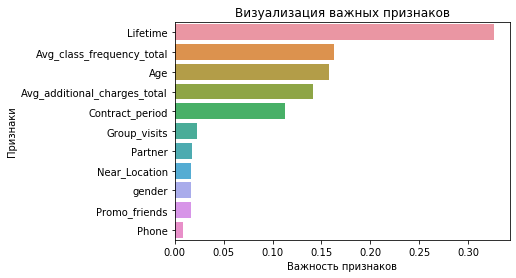

In [38]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность признаков')
plt.ylabel('Признаки')
plt.title('Визуализация важных признаков')
plt.show()

Наиболее важными признаками оказались:
- Lifetime                       0.326
- Avg_class_frequency_total      0.163
- Age                            0.158
- Avg_additional_charges_total   0.141
- Contract_period                0.113       

## Сделайте кластеризацию клиентов

Отложите в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):

In [39]:
gym_churn_features = gym_churn.drop('Churn', axis = 1)

### Стандартизируйте данные

Я сделал это ранее, но повторю эти шаги здесь, чтобы не нарушать порядок заданий

In [40]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(gym_churn_features)

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму

In [41]:
linked = linkage(x_sc, method = 'ward')

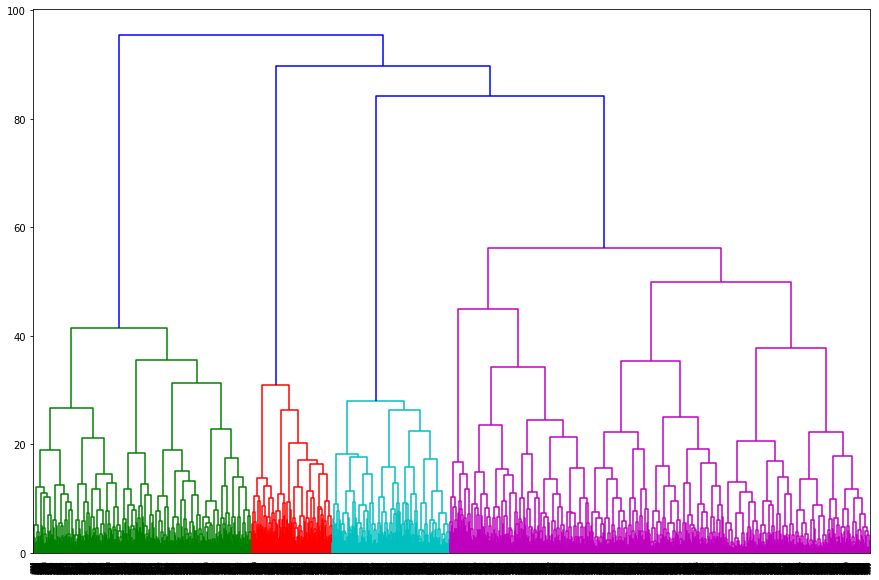

In [42]:
# В переменной linked сохранена таблица «связок» между объектами.
# Её можно визуализировать как дендрограмму: 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show()

График предлагает нам 4 кластера (4 цвета), но далее мы будем использовать 5 кластеров. Так просят нас, может оно и лучше

### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. 

In [43]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

In [44]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

In [45]:
# сохраняем метки кластера в поле нашего датасета
gym_churn_features['cluster_km'] = labels
gym_churn_features.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,cluster_km
0,1,1,1,1,0,6,1,29,14.227,3,0.020,4
1,0,1,0,0,1,12,1,31,113.203,7,1.923,3
2,0,1,1,0,1,1,0,28,129.448,2,1.859,2
3,0,1,1,1,1,12,1,33,62.670,2,3.206,1
4,1,1,1,1,1,1,0,26,198.362,3,1.114,1


In [46]:
# выводим статистику по средним значениям наших признаков по кластеру
gym_churn_features.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
cluster_km,,,,,,,,,,,
0,0.499,0.000,0.488,0.077,1.000,3.032,0.235,28.722,137.540,3.061,1.770
1,0.489,0.995,0.955,0.892,1.000,7.661,0.458,29.544,155.861,4.381,1.979
2,0.505,1.000,0.239,0.059,1.000,2.820,0.000,28.770,143.384,3.344,1.801
3,0.544,1.000,0.250,0.079,1.000,4.528,1.000,29.536,148.089,3.761,1.941
4,0.523,0.863,0.472,0.306,0.000,4.777,0.427,29.298,144.208,3.940,1.854


Что можно сразу заметить по средним значениям:
- В 5 группе все "не местные", пришли не от друзей, в среднем абонемент на три месяца, посещаймость на 4 месте
- Во 2 группе "местные" не от друзей, средний абонемет 2 месяца, самые молодые (27,5 лет), мало тратят на сопутствующие услуги и реже всех ходят. Очень похоже, что фитнесс им для галочки
- В 3 группе самые активные (2,4 похода в неделю), дольше всех ходят (5,7 месяцев), больше всех тратят на сопутствующие услуги (186 у.е), саммые возрастные (31 год) и почти все "местные". Очень похожи на фанатов, кому важна своя фигура.
- Первая группа, местные, которые пришли от друзей, да ещё и по партнёрской акции, они так же часто ходят и достаточно долго (4 месяца), да и групповые посещения у них самые частые. При этом абонементы у них самые долгие. Вместе веселее, как говориться
- 4 группа сильно похожа на 5, за исключением того, что они местные

### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

In [47]:
# её у себя посмотрел, но решил закоменьтить, очень долго грузится, аккуратно!
# дальше нарисовал только срез, с самыми интересными графиками
#sns.pairplot(gym_churn_features, hue='cluster_km')
#plt.show()

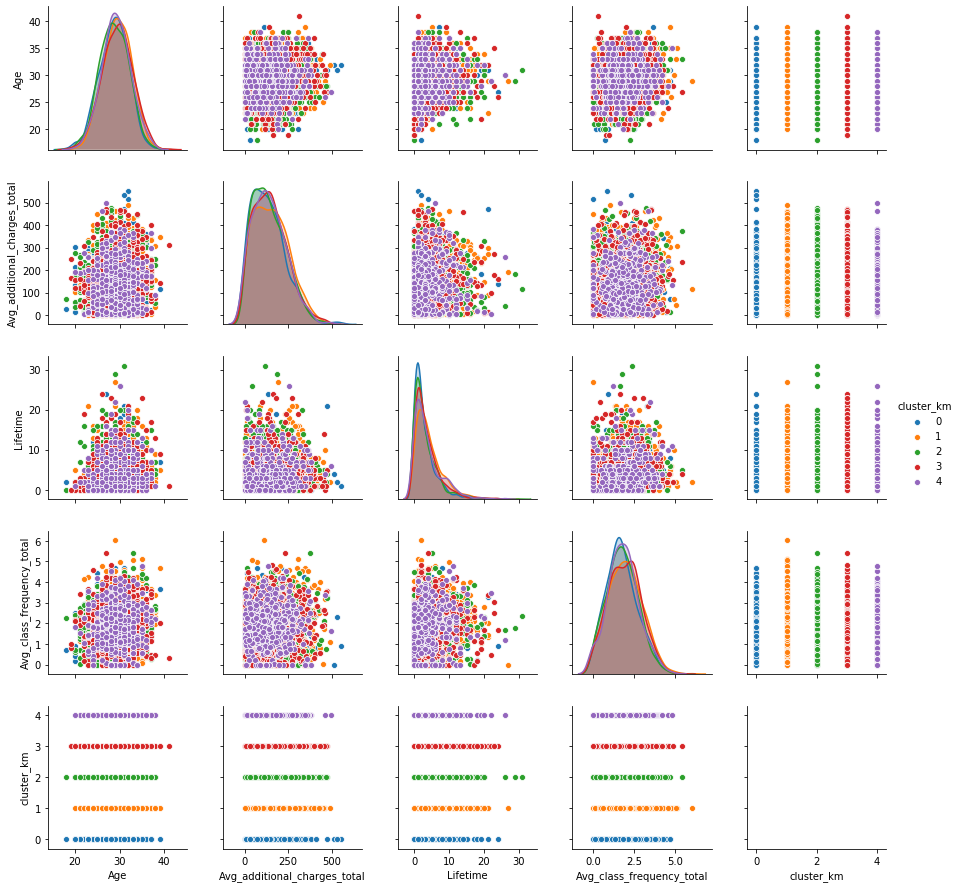

In [48]:
sns.pairplot(gym_churn_features.loc[:,['Age',
                                'Avg_additional_charges_total',
                                'Lifetime', 
                                'Avg_class_frequency_total',
                                'cluster_km']], hue='cluster_km')
plt.show()

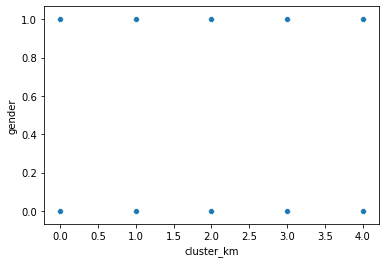

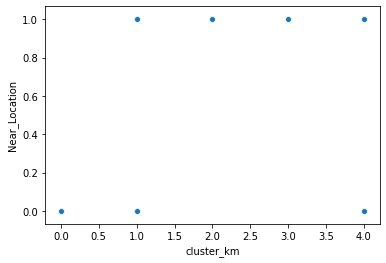

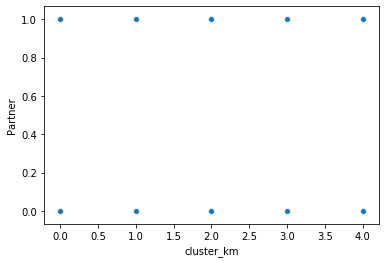

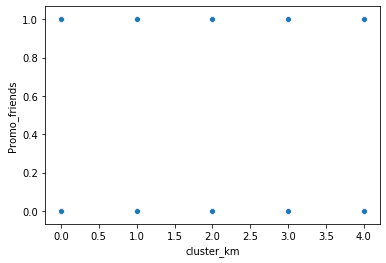

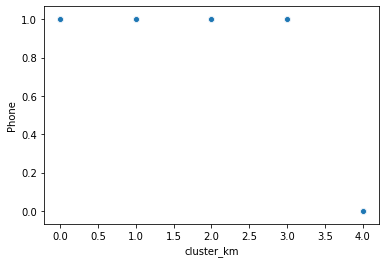

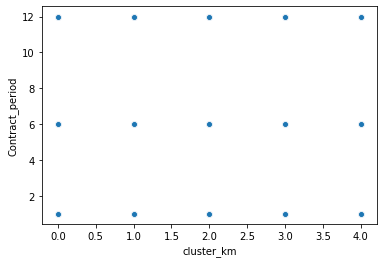

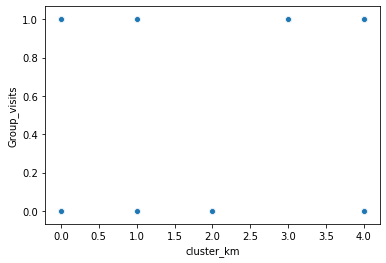

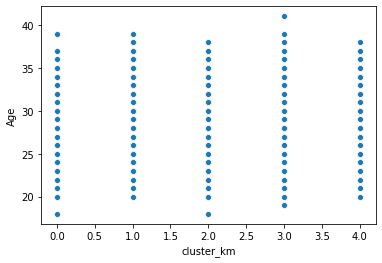

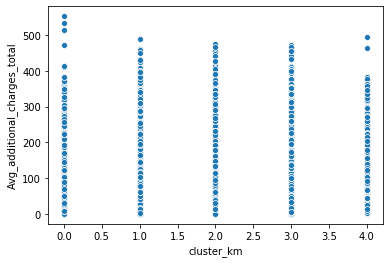

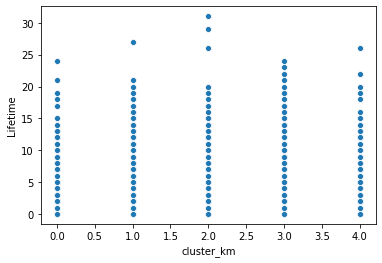

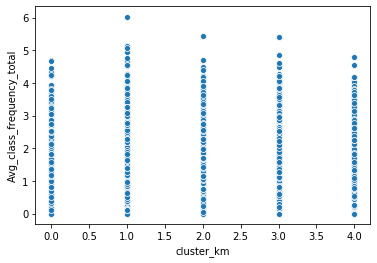

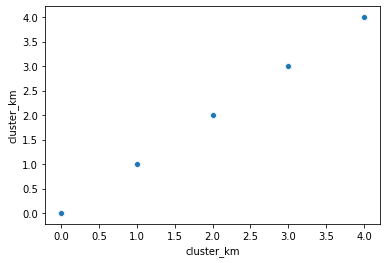

In [49]:
#построим попарные диаграммы рассеяния признак-'cluster_km' для каждого признака
for col in gym_churn_features.columns:
    sns.scatterplot(gym_churn_features['cluster_km'], gym_churn_features[col]) 
    plt.show()

На этих график мы смотрим рассеяние по кластерам для различных признаков.

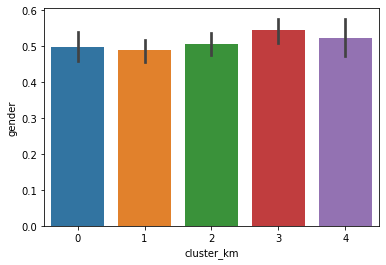

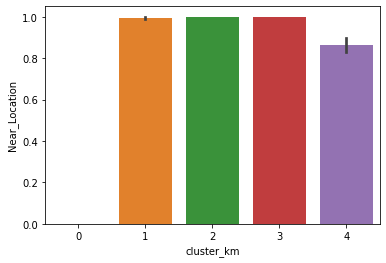

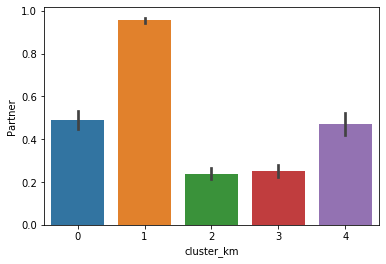

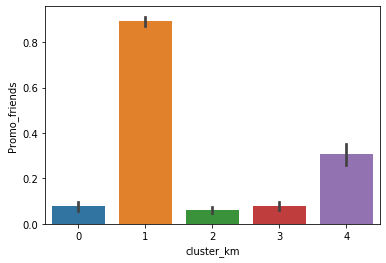

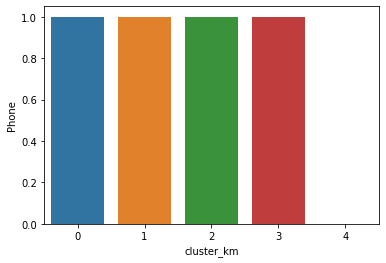

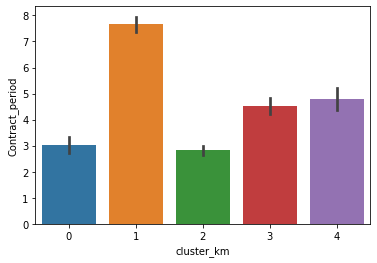

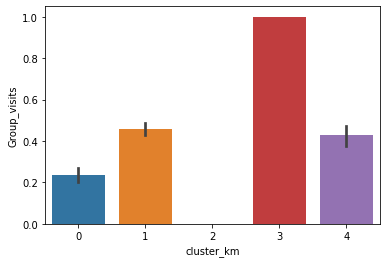

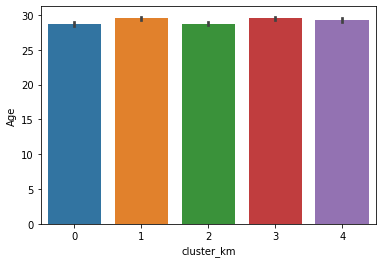

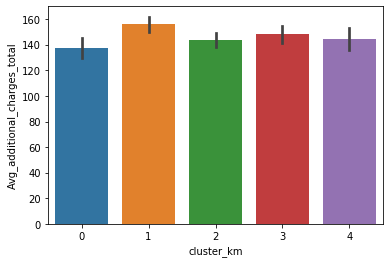

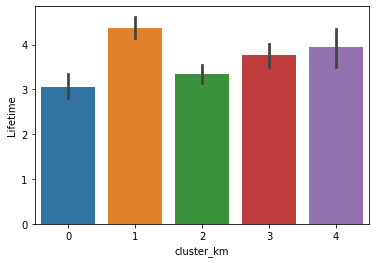

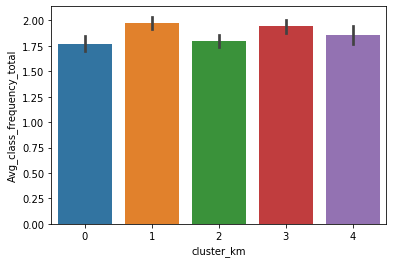

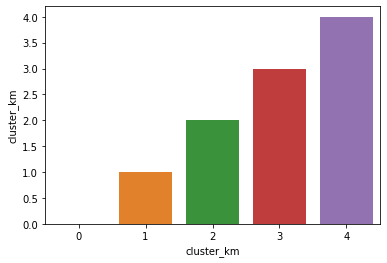

In [50]:
#построим попарные столбчатые диаграммы признак-'cluster_km' для каждого признака
for col in gym_churn_features.columns:
    sns.barplot(x="cluster_km", y=col, data=gym_churn_features) 
    plt.show()

Здесь мы видим распределение среднего значения признаков по кластерам

### Для каждого полученного кластера посчитайте долю оттока методом groupby()

In [51]:
# соединим со старой таблицей, сразу по нескольким столбцам, а то уникального индификатора нет,
# боюсь дубликаты  или ещё чего появится
gym_churn_features = gym_churn_features.merge(gym_churn, on=['gender', 'Near_Location', 
                                                             'Partner', 'Promo_friends', 
                                                             'Phone', 'Contract_period',
                                                             'Group_visits', 'Age',
                                                             'Avg_additional_charges_total',
                                                             'Lifetime', 'Avg_class_frequency_total']) 
gym_churn_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 13 columns):
gender                          4000 non-null int64
Near_Location                   4000 non-null int64
Partner                         4000 non-null int64
Promo_friends                   4000 non-null int64
Phone                           4000 non-null int64
Contract_period                 4000 non-null int64
Group_visits                    4000 non-null int64
Age                             4000 non-null int64
Avg_additional_charges_total    4000 non-null float64
Lifetime                        4000 non-null int64
Avg_class_frequency_total       4000 non-null float64
cluster_km                      4000 non-null int32
Churn                           4000 non-null int64
dtypes: float64(2), int32(1), int64(10)
memory usage: 421.9 KB


In [52]:
gym_churn_features.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,cluster_km,Churn
0,1,1,1,1,0,6,1,29,14.227,3,0.020,4,0
1,0,1,0,0,1,12,1,31,113.203,7,1.923,3,0
2,0,1,1,0,1,1,0,28,129.448,2,1.859,2,0
3,0,1,1,1,1,12,1,33,62.670,2,3.206,1,0
4,1,1,1,1,1,1,0,26,198.362,3,1.114,1,0


Вроде всё хорошо соединилось

In [53]:
gym_churn_features_new = gym_churn_features.groupby(by='cluster_km')
gym_churn_features_new.mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
cluster_km,,,,,,,,,,,,
0,0.499,0.000,0.488,0.077,1.000,3.032,0.235,28.722,137.540,3.061,1.770,0.399
1,0.489,0.995,0.955,0.892,1.000,7.661,0.458,29.544,155.861,4.381,1.979,0.121
2,0.505,1.000,0.239,0.059,1.000,2.820,0.000,28.770,143.384,3.344,1.801,0.382
3,0.544,1.000,0.250,0.079,1.000,4.528,1.000,29.536,148.089,3.761,1.941,0.201
4,0.523,0.863,0.472,0.306,0.000,4.777,0.427,29.298,144.208,3.940,1.854,0.267


In [54]:
gym_churn_features_new['Churn'].mean()

cluster_km
0   0.399
1   0.121
2   0.382
3   0.201
4   0.267
Name: Churn, dtype: float64

Если я не напутал ничего с матекматикой, и "1" это те, кто ушёл, то простая группировка по кластерам и вычисленее среднего дадут нам долю оттока по этим же кластерам:

0. отток  0.267
1. отток  0.311
2. отток  0.114
3. отток  0.320
4. отток  0.399

## Выводы и рекомендации

Мы провели анализ клиентов фитнес центров. Составили 5 кластеров клиентов (названия кластеров исправил на более понятный для простых людей, без "0"):
    
- В 5 группе все "не местные", пришли не от друзей, в среднем абонемент на три месяца, посещаймость на 4 месте
- Во 2 группе "местные" не от друзей, средний абонемет 2 месяца, самые молодые (27,5 лет), мало тратят на сопутствующие услуги и реже всех ходят. Очень похоже, что фитнесс им для галочки
- В 3 группе самые активные (2,4 похода в неделю), дольше всех ходят (5,7 месяцев), больше всех тратят на сопутствующие услуги (186 у.е), саммые возрастные (31 год) и почти все "местные". Очень похожи на фанатов, кому важна своя фигура.
- Первая группа, местные, которые пришли от друзей, да ещё и по партнёрской акции, они так же часто ходят и достаточно долго (4 месяца), да и групповые посещения у них самые частые. При этом абонементы у них самые долгие. Вместе веселее, как говориться
- 4 группа сильно похожа на 5, за исключением того, что они местные

Доля оттока по этим же кластерам:
    
1. отток  0.267
2. отток  0.311
3. отток  0.114
4. отток  0.320
5. отток  0.399
    
Как можем заметить, хоть 4 и 5 группа похожи по многим параметрам, достаточного только того, что они не местные и вероятность ухода увеличивается. Во второй группе так же высока вероятность оттока, очень маломотивированы для регулярных походов, и в следствие этого теряют быстро интерес. Первая благодаря групповым занятиям и более долгим абонементам держаться дольше.

Рекомендации:

- болие выгодные длительные абонементы
- бесплатные обучающие тренировки для молодых новичков
- доступные групповые занятия, где люди могут найти друзей
- больше рекламы для местных